# Canny Edge Detector

In [132]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

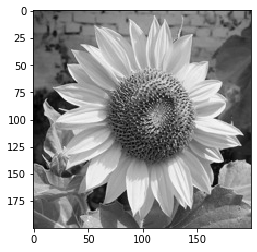

In [162]:
image=cv2.imread('flower.jpg')
imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
#The input image is converted to grayscale and the resulting image is as follows

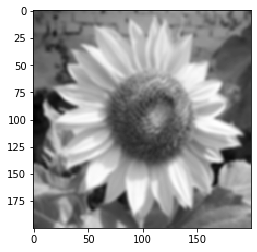

In [164]:
I_g=cv2.GaussianBlur(gray,(5,5),1.4)
saveImg = cv2.imwrite("output.jpg",I_g)
plt.imshow(I_g,cmap='gray')
#A Gaussian filter is applied to this grayscale image to obtain a smooth image for further processing.

In [166]:
def normalize(img):
    img = img/np.max(img)
    return img

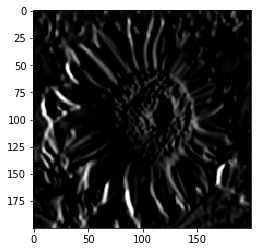

In [169]:
#Sobel edge detection: A Sobel filter is applied in two different directions in order to record the abrupt intensity change in the respective directions.
# Sobel for x direction
kernel_Sobel_x = np.array([[-1,0,+1],[-2,0,+2],[-1,0,+1]])
g_x=cv2.filter2D(I_g,-1,kernel_Sobel_x).astype('float64')
g_x=normalize(g_x)
plt.imshow(g_x,cmap='gray')

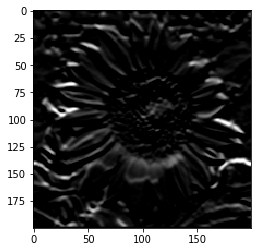

In [171]:
#Sobel for y direction
kernel_Sobel_y = np.array([[-1,-2,-1], [0,0,0], [+1,+2,+1]])
g_y=cv2.filter2D(I_g,-1,kernel_Sobel_y).astype('float64')
g_y=normalize(g_y)
plt.imshow(g_y,cmap='gray')

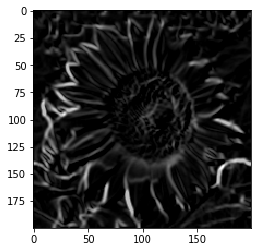

In [149]:
#Magnitude of derivatives combined
M_xy=np.hypot(g_x,g_y)
M_xy=normalize(M_xy)
plt.imshow(M_xy,cmap='gray')

In [174]:
#The direction of the derivatives
alpha_xy=np.degrees(np.arctan2(g_y,g_x))

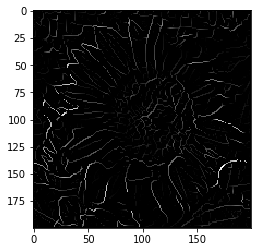

In [151]:
#Non maximal suppression
g_nxy=np.zeros([M_xy.shape[0],M_xy.shape[1]])
for i in range(1,M_xy.shape[0]-1):
    for j in range(1,M_xy.shape[1]-1):
        if alpha_xy[i][j]<=22.5 and alpha_xy[i][j]>=-22.5:
            if M_xy[i][j]>M_xy[i][j-1] and M_xy[i][j]>M_xy[i][j+1]:
                g_nxy[i][j]=M_xy[i][j]
        elif alpha_xy[i][j]>=22.5 and alpha_xy[i][j]<=67.5:
            if M_xy[i][j]>M_xy[i-1][j-1] and M_xy[i][j]>M_xy[i+1][j+1]:
                g_nxy[i][j]=M_xy[i][j]
        elif alpha_xy[i][j]*180>=67.5 or alpha_xy[i][j]<=-67.5:
            if M_xy[i][j]>M_xy[i-1][j] and M_xy[i][j]>M_xy[i+1][j]:
                g_nxy[i][j]=M_xy[i][j]
        elif alpha_xy[i][j]<=-22.5 and alpha_xy[i][j]>=-67.5:
            if M_xy[i][j]>M_xy[i+1][j-1] and M_xy[i][j]>M_xy[i-1][j+1]:
                g_nxy[i][j]=M_xy[i][j]
g_nxy=normalize(g_nxy)
plt.imshow(g_nxy,cmap='gray')

In [175]:
#Edge linlikng
H=0.1 #High threshold
L=0.02 #Low threshold
temp_new=0.1
temp_old=0
while(temp_old!=temp_new):
    temp_old=temp_new 
    for i in range(1,g_nxy.shape[0]-1):
        for j in range(1,g_nxy.shape[1]-1):
            if(g_nxy[i,j]>H):
                g_nxy[i,j]=1
            elif(g_nxy[i,j]<L):
                g_nxy[i,j]=0
            else:
                if((g_nxy[i-1,j-1] > H) or (g_nxy[i-1,j] > H) or (g_nxy[i-1,j+1] > H) or (g_nxy[i,j-1] > H) or (g_nxy[i,j+1] > H) or (g_nxy[i+1,j-1] > H) or (g_nxy[i+1,j] > H) or (g_nxy[i+1,j+1] > H)):
                    g_nxy[i,j]=1
    temp_new=np.sum(g_nxy==1)

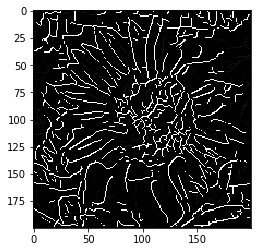

In [176]:
plt.imshow(g_nxy, cmap = 'gray')
plt.show()

In [154]:
saveImg = cv2.imwrite("output.jpg",(g_nxy*255).astype(int))

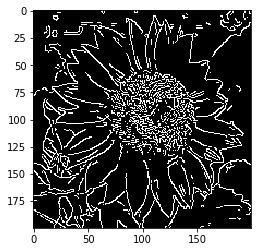

In [177]:
#Using opencv
canny=cv2.Canny(gray,200,160)
saveImg = cv2.imwrite("output.jpg",canny)
plt.imshow(canny,cmap='gray')